In [7]:
# Step 1: Load and Preprocess the Iris Dataset

import pandas as pd

# Load the dataset
df = pd.read_csv("Iris.csv")

# Display the first few rows
print("🔍 First 5 Rows of the Dataset:")
display(df.head())

# Check for missing values
print("\n🔍 Missing Values:")
print(df.isnull().sum())

# Drop unnecessary column if present (some versions have an 'Id' column)
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Encode the target labels (Species column)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Confirm label encoding
print("\n✅ Encoded Species Classes:")
print(dict(zip(le.classes_, le.transform(le.classes_))))


🔍 First 5 Rows of the Dataset:


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


🔍 Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

✅ Encoded Species Classes:
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


Basic Statistical Summary:


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
count     150.000000    150.000000     150.000000    150.000000  150.000000
mean        5.843333      3.054000       3.758667      1.198667    1.000000
std         0.828066      0.433594       1.764420      0.763161    0.819232
min         4.300000      2.000000       1.000000      0.100000    0.000000
25%         5.100000      2.800000       1.600000      0.300000    0.000000
50%         5.800000      3.000000       4.350000      1.300000    1.000000
75%         6.400000      3.300000       5.100000      1.800000    2.000000
max         7.900000      4.400000       6.900000      2.500000    2.000000

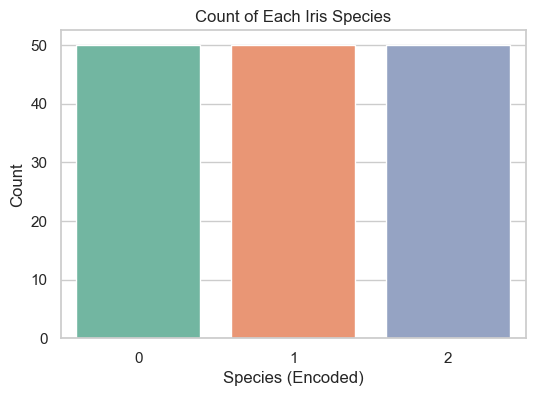

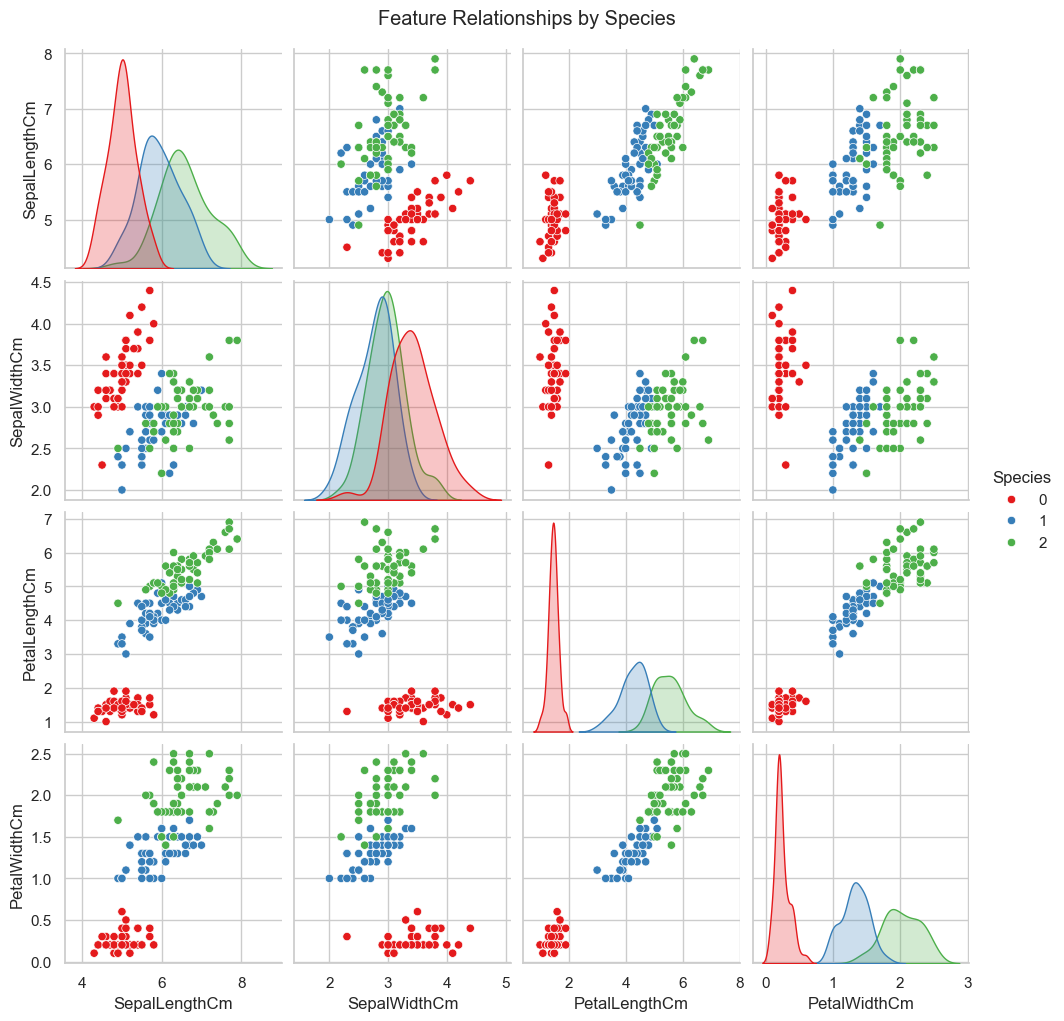

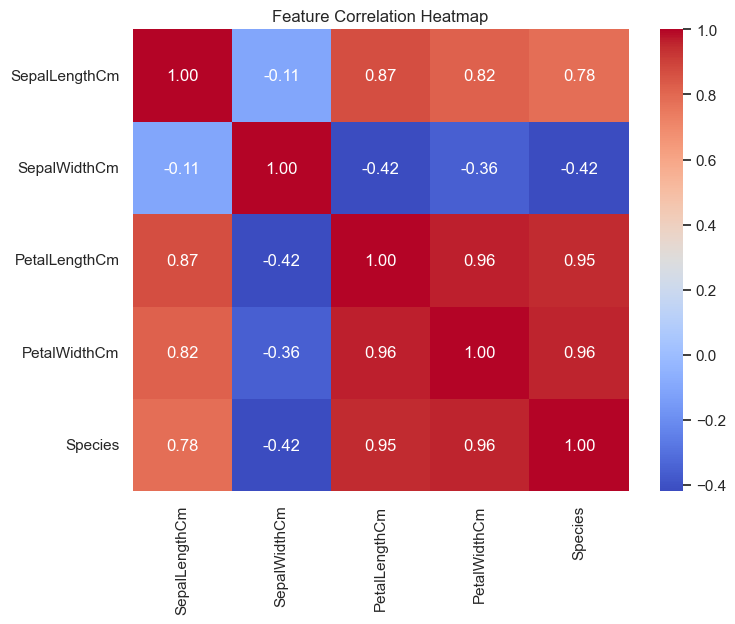

In [8]:
#✅ Step 2: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Basic stats
print("Basic Statistical Summary:")
display(df.describe())

# 2. Count of each species
plt.figure(figsize=(6, 4))
sns.countplot(x='Species', data=df, hue='Species', palette='Set2', legend=False)
plt.title("Count of Each Iris Species")
plt.xlabel("Species (Encoded)")
plt.ylabel("Count")
plt.show()

# 3. Pairplot to explore relationships
sns.pairplot(df, hue='Species', palette='Set1')
plt.suptitle("Feature Relationships by Species", y=1.02)
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
#✅ Step 3: Train a Decision Tree Classifier (with Comments)
# 1. Import the necessary Scikit-learn libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


In [10]:
# 2. Define features (X) and label/target variable (y)
# We drop the 'Species' column from X because it's the target we're trying to predict
X = df.drop('Species', axis=1)
y = df['Species']


In [11]:
# 3. Split the dataset into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, 80% for training
# random_state=42 ensures reproducibility (same split every time you run it)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# 4. Initialize the Decision Tree model
# We also set random_state for reproducibility
model = DecisionTreeClassifier(random_state=42)

# 5. Train the model using the training data
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [13]:
# 6. Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)


In [14]:
# 7. Evaluate model performance using common metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))  # Overall how often is the model correct?
print("✅ Precision (macro):", precision_score(y_test, y_pred, average='macro'))  # How many selected items are relevant?
print("✅ Recall (macro):", recall_score(y_test, y_pred, average='macro'))  # How many relevant items are selected?
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))  # Detailed metrics per class


✅ Accuracy: 1.0
✅ Precision (macro): 1.0
✅ Recall (macro): 1.0

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
#✅ Step 4 Visualize Model Evaluation with Confusion Matrix (with Comments)
# 1. Import libraries needed to create and visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


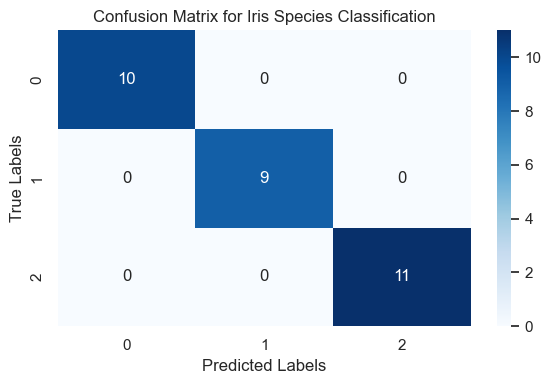

In [18]:
# 2. Compute the confusion matrix
# This compares true labels (y_test) with predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# 3. Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, 
            yticklabels=model.classes_)  # Use model.classes_ to label axes

# 4. Add chart title and labels
plt.title("Confusion Matrix for Iris Species Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# 5. Display the plot
plt.tight_layout()
plt.show()
